In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df=pd.read_csv('CC GENERAL.csv')

- **Data Understanding and Exploration**

In [4]:
df.shape

(8950, 18)

In [5]:
df.info() #data understanding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.drop(columns='CUST_ID').describe() #exploring data 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [8]:
df.duplicated().sum() #checking duplicates

0

In [9]:
df.isnull().sum() #cheching null values

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<Axes: >

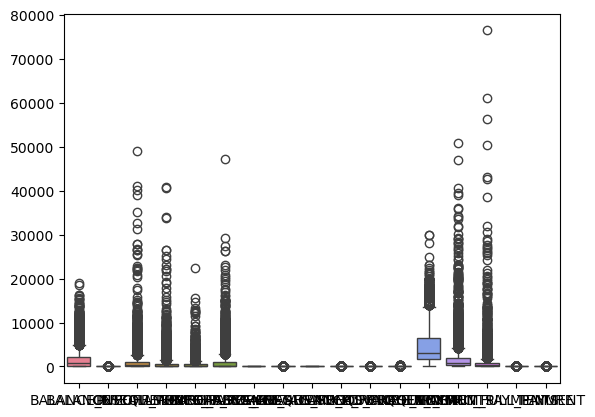

In [10]:
sns.boxplot(df) #CHECKING OUTLIERS

- **Data Cleaning**

In [12]:
df.drop(columns='CUST_ID',inplace=True) #Droping Unwanted columns

In [13]:
df[df['MINIMUM_PAYMENTS'].isnull()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [14]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True) #Replaced with meaian because column contain outliers

In [15]:
df[df['CREDIT_LIMIT'].isnull()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [16]:
df.drop(index=5203,inplace=True) #Droping the missing value of CREDIT_LIMIT

In [17]:
df.isnull().sum() #Again checking null values

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

- We have to retrain outliers in this data set because they are important

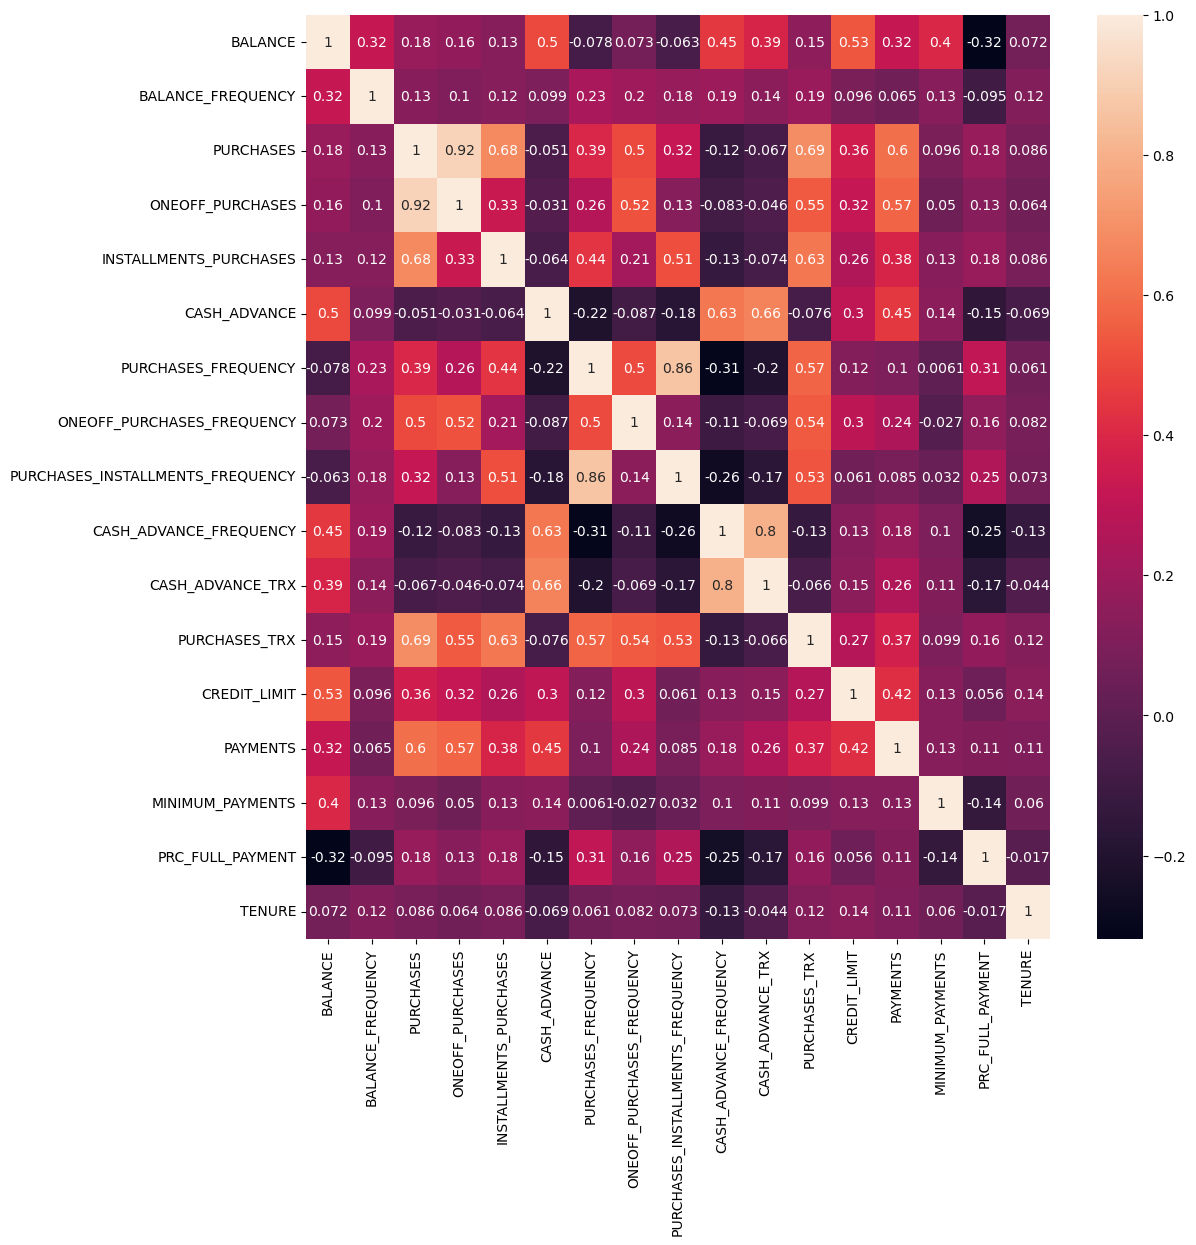

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [20]:
dfa=df.copy() #copying for transformation and modeling

- **Data Tranformation**

In [22]:
df.skew() #checking Distribution

BALANCE                              2.393270
BALANCE_FREQUENCY                   -2.024193
PURCHASES                            8.143969
ONEOFF_PURCHASES                    10.044622
INSTALLMENTS_PURCHASES               7.298823
CASH_ADVANCE                         5.166323
PURCHASES_FREQUENCY                  0.059970
ONEOFF_PURCHASES_FREQUENCY           1.535453
PURCHASES_INSTALLMENTS_FREQUENCY     0.509023
CASH_ADVANCE_FREQUENCY               1.828644
CASH_ADVANCE_TRX                     5.720976
PURCHASES_TRX                        4.630493
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907465
MINIMUM_PAYMENTS                    13.851853
PRC_FULL_PAYMENT                     1.942641
TENURE                              -2.944788
dtype: float64

In [23]:
df['BALANCE'] = df['BALANCE']**(1/4)

In [24]:
df['BALANCE_FREQUENCY'] = df['BALANCE_FREQUENCY']**11

In [25]:
df['PURCHASES'] = df['PURCHASES']**(1/4)

In [26]:
df['ONEOFF_PURCHASES'],p = stats.boxcox(df['ONEOFF_PURCHASES']+0.001)

In [27]:
df['INSTALLMENTS_PURCHASES'],p = stats.boxcox(df['INSTALLMENTS_PURCHASES']+0.001)

In [28]:
df['CASH_ADVANCE'],p = stats.boxcox(df['CASH_ADVANCE']+0.001)

In [29]:
df['ONEOFF_PURCHASES_FREQUENCY'] = df['ONEOFF_PURCHASES_FREQUENCY']**(1/8)

In [30]:
df['CASH_ADVANCE_FREQUENCY'] = np.log(df['CASH_ADVANCE_FREQUENCY']+0.001)

In [31]:
df['CREDIT_LIMIT'],p=stats.boxcox(df['CREDIT_LIMIT']+0.001)

In [32]:
df['PAYMENTS'],p = stats.boxcox(df['PAYMENTS']+0.001)

In [33]:
df['MINIMUM_PAYMENTS'],p = stats.boxcox(df['MINIMUM_PAYMENTS']+0.001)

In [34]:
df['PRC_FULL_PAYMENT'],p = stats.boxcox(df['PRC_FULL_PAYMENT']+0.001)

In [35]:
df.skew() #Re-checking Distribution

BALANCE                            -0.009866
BALANCE_FREQUENCY                  -0.924189
PURCHASES                          -0.116031
ONEOFF_PURCHASES                   -0.005484
INSTALLMENTS_PURCHASES             -0.164074
CASH_ADVANCE                        0.108957
PURCHASES_FREQUENCY                 0.059970
ONEOFF_PURCHASES_FREQUENCY         -0.002837
PURCHASES_INSTALLMENTS_FREQUENCY    0.509023
CASH_ADVANCE_FREQUENCY              0.167760
CASH_ADVANCE_TRX                    5.720976
PURCHASES_TRX                       4.630493
CREDIT_LIMIT                       -0.009721
PAYMENTS                            0.158047
MINIMUM_PAYMENTS                   -0.004040
PRC_FULL_PAYMENT                    0.685607
TENURE                             -2.944788
dtype: float64

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = sc.fit_transform(df)

In [37]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 0.95)
df = pca_model.fit_transform(df)

In [38]:
df.shape

(8949, 10)

# Modeling

- **K-Means**

In [41]:
from sklearn.cluster import KMeans #checking WCSS value
wcss = []
for i in range(1,11):
    m = KMeans(n_clusters=i)
    m.fit(df)
    wcss.append(m.inertia_)

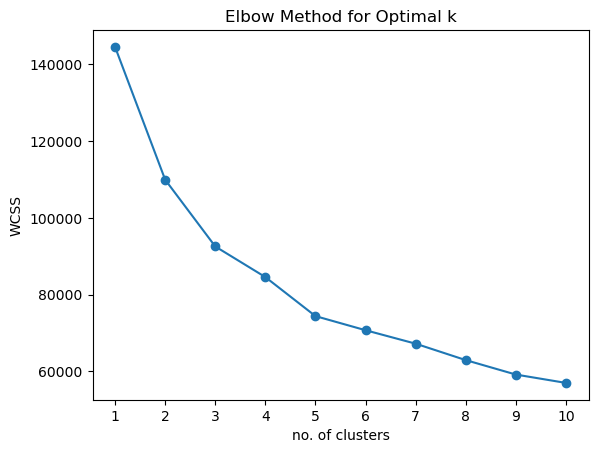

In [42]:
plt.plot(range(1,11),wcss,marker='o')
plt.xticks(range(1,11))
plt.xlabel('no. of clusters')
plt.ylabel('WCSS')
plt.title("Elbow Method for Optimal k")
plt.show()

In [43]:
from sklearn.cluster import KMeans
mk = KMeans(n_clusters=4)
mk.fit(df)
dfa['K_means_result']= mk.predict(df)

- **Hierarical clustering**

In [45]:
from sklearn.cluster import AgglomerativeClustering
mh = AgglomerativeClustering(n_clusters=4)
dfa['H_result'] = mh.fit_predict(df)

- **DBSCAN**

In [47]:
from sklearn.cluster import DBSCAN
x=False
for i in range(3,4):
    for j in range(3,100):
        md = DBSCAN(eps=i, min_samples=j)
        labels = md.fit_predict(df)
        if pd.Series(labels).nunique() == 4:
            print(i,j)
            x=True
           # break
   # if x==True:
    #    break

In [48]:
from sklearn.cluster import DBSCAN
md = DBSCAN(eps=2, min_samples=12)
dfa['DBSCAN_result'] = md.fit_predict(df)

In [49]:
dfa['DBSCAN_result'].value_counts()

DBSCAN_result
 0    4554
 1    4098
-1     290
 2       7
Name: count, dtype: int64

In [50]:
dfa['K_means_result'].value_counts()

K_means_result
2    2826
1    2183
0    2007
3    1933
Name: count, dtype: int64

In [51]:
dfa['H_result'].value_counts()

H_result
0    2683
1    2286
2    2026
3    1954
Name: count, dtype: int64